<a href="https://colab.research.google.com/github/tanuku-srivalli/Housing/blob/main/AIML_TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**

Housing.csv
Feature_X    0
Target_Y     0
dtype: int64

--- Step 2: Splitting Data ---
Training samples: 80
Testing samples: 20

--- Step 3: Fitting Model ---

--- Step 4: Evaluating Model ---
Mean Absolute Error (MAE): $0.5913
Mean Squared Error (MSE): $0.6537
R-squared Score (R²): 0.8072

--- Step 5: Interpretation & Plotting ---
Model Intercept (b₀): 4.1429
Model Coefficient (b₁): 2.7993

Interpretation: For every 1-unit increase in Feature_X, the Target_Y is predicted to change by 2.7993 units.


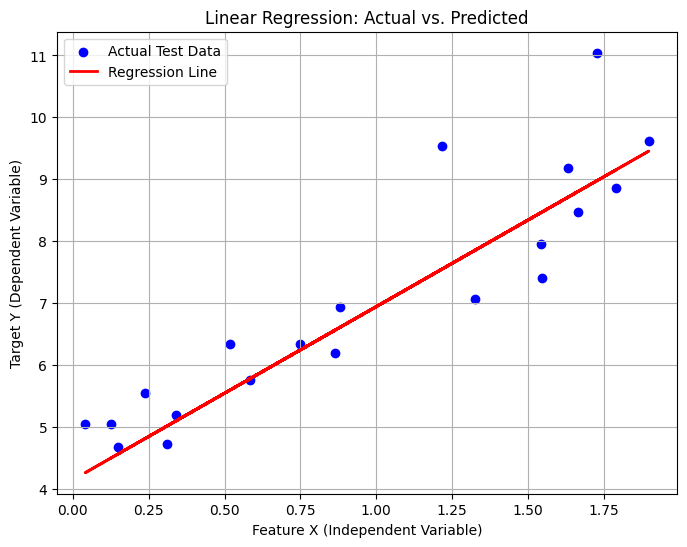

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==============================================================================
# 1. Import and preprocess the dataset
# ==============================================================================

# --- A. Load the Dataset ---
print('Housing.csv')

df = pd.read_csv('Housing.csv')

np.random.seed(42) # for reproducibility
X_data = 2 * np.random.rand(100, 1) # Feature (e.g., Years of Experience)
y_data = 4 + 3 * X_data + np.random.randn(100, 1) # Target (e.g., Salary)
df = pd.DataFrame(X_data, columns=['Feature_X'])
df['Target_Y'] = y_data

# Separate features (X) and target (y)
X = df[['Feature_X']] # Must be a 2D structure (DataFrame or numpy array)
y = df['Target_Y']   # Can be a 1D structure (Series or numpy array)

# --- B. Simple Preprocessing ---

print(df.isnull().sum())
df.dropna(inplace=True)

# ==============================================================================
# 2. Split data into train-test sets
# ==============================================================================
print("\n--- Step 2: Splitting Data ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # Use 20% of data for testing
    random_state=42   # Ensures the same split every time
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


# ==============================================================================
# 3. Fit a Linear Regression model
# ==============================================================================
print("\n--- Step 3: Fitting Model ---")

# 1. Create the model instance
model = LinearRegression()

# 2. Train the model using the *training* data
model.fit(X_train, y_train)

# Make predictions on the *test* set
y_pred = model.predict(X_test)


# ==============================================================================
# 4. Evaluate model using MAE, MSE, R²
# ==============================================================================
print("\n--- Step 4: Evaluating Model ---")

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.4f}")
print(f"Mean Squared Error (MSE): ${mse:,.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


# ==============================================================================
# 5. Plot regression line and interpret coefficients
# ==============================================================================
print("\n--- Step 5: Interpretation & Plotting ---")

# 1. Interpret Coefficients
intercept = model.intercept_[0] if isinstance(model.intercept_, np.ndarray) else model.intercept_
coefficient = model.coef_[0][0] if isinstance(model.coef_[0], np.ndarray) else model.coef_[0]

print(f"Model Intercept (b₀): {intercept:.4f}")
print(f"Model Coefficient (b₁): {coefficient:.4f}")
print(f"\nInterpretation: For every 1-unit increase in Feature_X, the Target_Y is predicted to change by {coefficient:.4f} units.")

# 2. Plotting (for Simple Linear Regression)
plt.figure(figsize=(8, 6))
# Scatter plot of the actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual Test Data')
# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Feature X (Independent Variable)')
plt.ylabel('Target Y (Dependent Variable)')
plt.legend()
plt.grid(True)
plt.show()